In [16]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 20.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [5]:
print(os.listdir(path))  # List files in the dataset folder

['Titanic-Dataset.csv']


In [7]:
df=pd.read_csv(path+'/Titanic-Dataset.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


<ipython-input-10-0c83a73ddc8d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-10-0c83a73ddc8d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [11]:
print(df.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [12]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=["Embarked"])


In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


In [15]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.2f}")


Logistic Regression Accuracy: 0.81


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")


Random Forest Accuracy: 0.81


In [28]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.2f}")


SVM Accuracy: 0.78


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.2f}")


KNN Accuracy: 0.70


In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.2f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:38:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.79


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialiser et entraîner le modèle
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Prédictions
y_pred_dt = dt.predict(X_test)

# Évaluer l'accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")


Decision Tree Accuracy: 0.80


In [60]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialiser et entraîner le modèle
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees.fit(X_train, y_train)

# Prédictions
y_pred_extra = extra_trees.predict(X_test)

# Évaluer l'accuracy
acc_extra = accuracy_score(y_test, y_pred_extra)
print(f"Extra Trees Accuracy: {acc_extra:.2f}")


Extra Trees Accuracy: 0.83


In [33]:
from sklearn.naive_bayes import GaussianNB

# Initialiser et entraîner le modèle
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prédictions
y_pred_nb = nb.predict(X_test)

# Évaluer l'accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Accuracy: {acc_nb:.2f}")


Naïve Bayes Accuracy: 0.77


In [34]:
from sklearn.ensemble import AdaBoostClassifier

# Initialiser et entraîner le modèle
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Prédictions
y_pred_adaboost = adaboost.predict(X_test)

# Évaluer l'accuracy
acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {acc_adaboost:.2f}")


AdaBoost Accuracy: 0.79


In [35]:
from lightgbm import LGBMClassifier

# Initialiser et entraîner le modèle
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train, y_train)

# Prédictions
y_pred_lgbm = lgbm.predict(X_test)

# Évaluer l'accuracy
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {acc_lgbm:.2f}")


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
!pip install catboost

In [51]:
from catboost import CatBoostClassifier

# Initialiser et entraîner le modèle
catboost = CatBoostClassifier(iterations=200, learning_rate=0.001, depth=10, verbose=0, random_state=42)
catboost.fit(X_train, y_train)

# Prédictions
y_pred_catboost = catboost.predict(X_test)

# Évaluer l'accuracy
acc_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {acc_catboost:.2f}")


CatBoost Accuracy: 0.82


In [55]:
import matplotlib.pyplot as plt

# Dictionnaire des scores des modèles
models = {
    "Logistic Regression": acc_log,
    "Random Forest": acc_rf,
    "SVM": acc_svm,
    "KNN": acc_knn,
    "XGBoost": acc_xgb,
    "Decision Tree": acc_dt,
    "Extra Trees": acc_extra,
    "Naïve Bayes": acc_nb,
    "AdaBoost": acc_adaboost,
    "LightGBM": acc_lgbm,
    "CatBoost": acc_catboost
}

# Trier les modèles par précision
models = dict(sorted(models.items(), key=lambda item: item[1], reverse=True))

# Afficher les résultats
print("\nComparison of Model Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.2f}")

# Identifier le meilleur modèle
best_model = max(models, key=models.get)
print(f"\nBest Model: {best_model} with Accuracy: {models[best_model]:.2f}")



Comparison of Model Accuracies:
Extra Trees: 0.83
LightGBM: 0.82
CatBoost: 0.82
Logistic Regression: 0.81
Random Forest: 0.81
Decision Tree: 0.80
XGBoost: 0.79
AdaBoost: 0.79
SVM: 0.78
Naïve Bayes: 0.77
KNN: 0.70

Best Model: Extra Trees with Accuracy: 0.83


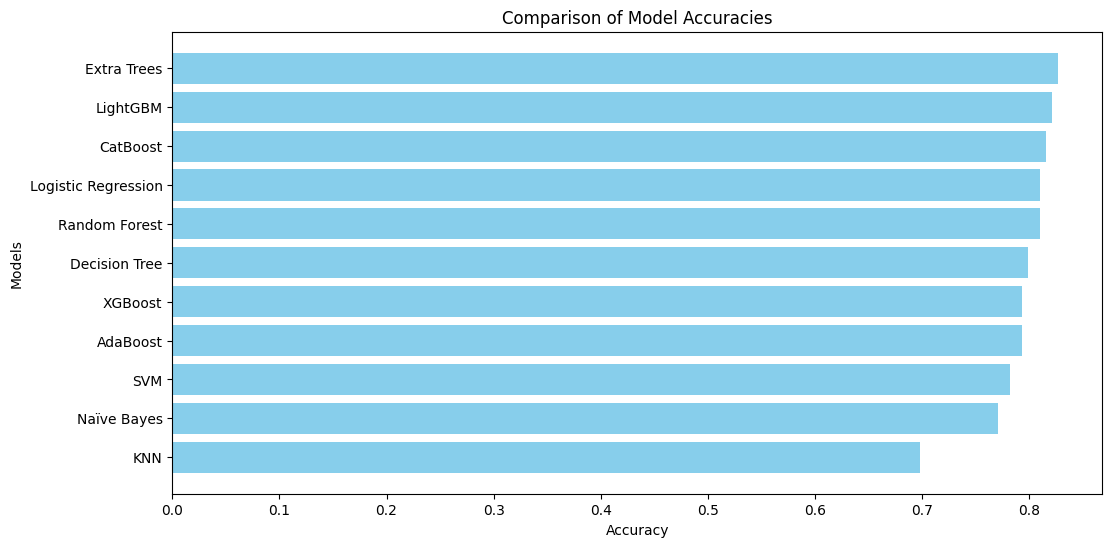

In [56]:
# Tracer un bar chart
plt.figure(figsize=(12, 6))
plt.barh(list(models.keys()), list(models.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Comparison of Model Accuracies")
plt.gca().invert_yaxis()  # Inverser l'axe pour afficher le meilleur en haut
plt.show()


In [57]:
best_model_name = max(models, key=models.get)
print(f"Best Model: {best_model_name} with Accuracy: {models[best_model_name]:.2f}")


Best Model: Extra Trees with Accuracy: 0.83


In [67]:
def predict_survival(model, pclass, sex, age, sibsp, parch, fare, embarked):
    person = pd.DataFrame({
        "Pclass": [pclass],
        "Sex": [0 if sex == "male" else 1],
        "Age": [age],
        "SibSp": [sibsp],
        "Parch": [parch],
        "Fare": [fare],
        "Embarked_C": [1 if embarked == "C" else 0],
        "Embarked_Q": [1 if embarked == "Q" else 0],
        "Embarked_S": [1 if embarked == "S" else 0]
    })

    prediction = model.predict(person)[0]
    return "Survived" if prediction == 1 else "Did not survive"

# Exemple d'utilisation
print(predict_survival(extra_trees, 1, "female", 35, 1, 0, 53.1000, "S"))


Survived


# FIN